In [ ]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Diabetes Prediction /diabetes.csv')

**Exploring the dataset**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [ ]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
# Returns basic statistics on numeric columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [ ]:
# check if any null value is present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

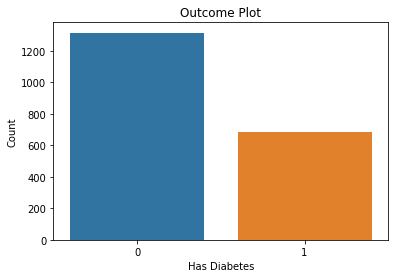

In [ ]:
sns.countplot(x='Outcome', data=df)

plt.title('Outcome Plot')
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

**Data Cleaning**

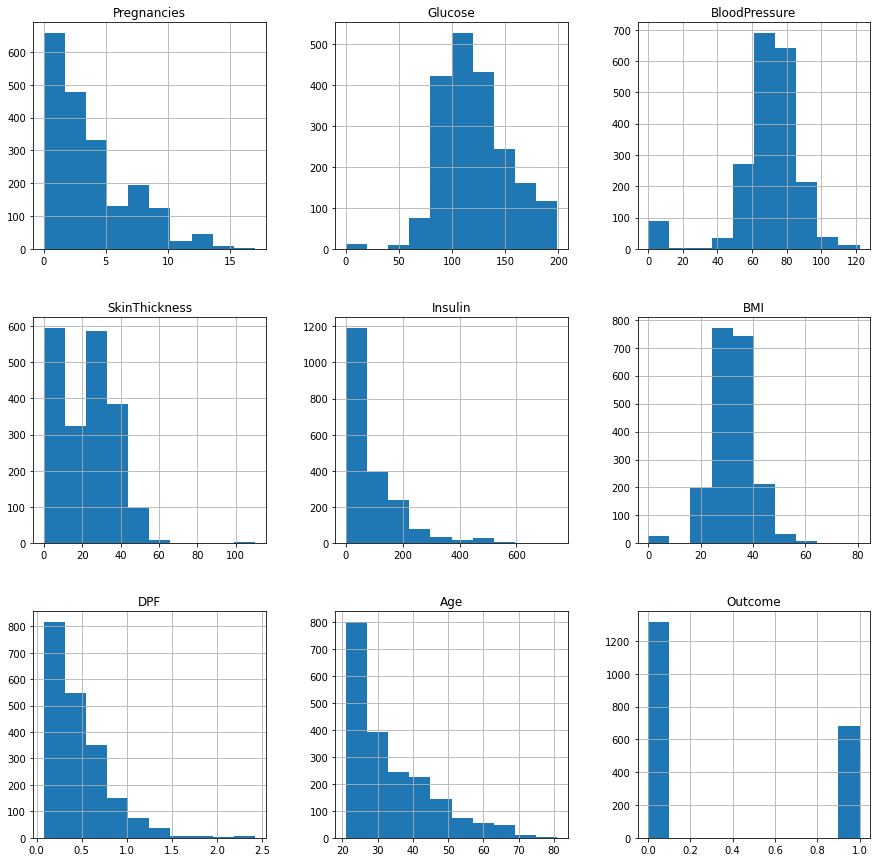

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(15,15))
plt.show()

In [ ]:
# Replacing the 0 values by mean, median depending upon distribution

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

**Data Visualization**

In [ ]:
## Correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.121569,0.199471,0.042450,-0.052486,0.011404,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.200509,0.185503,0.352656,0.233088,0.124176,0.259853,0.487977
BloodPressure,0.199471,0.200509,1.000000,0.167622,-0.014978,0.259419,0.015216,0.325490,0.171844
SkinThickness,0.042450,0.185503,0.167622,1.000000,0.255889,0.526836,0.133548,0.059255,0.181365
Insulin,-0.052486,0.352656,-0.014978,0.255889,1.000000,0.217600,0.181461,-0.052681,0.145165
BMI,0.011404,0.233088,0.259419,0.526836,0.217600,1.000000,0.142019,0.018731,0.282515
DPF,-0.025453,0.124176,0.015216,0.133548,0.181461,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325490,0.059255,-0.052681,0.018731,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.171844,0.181365,0.145165,0.282515,0.155459,0.236509,1.000000


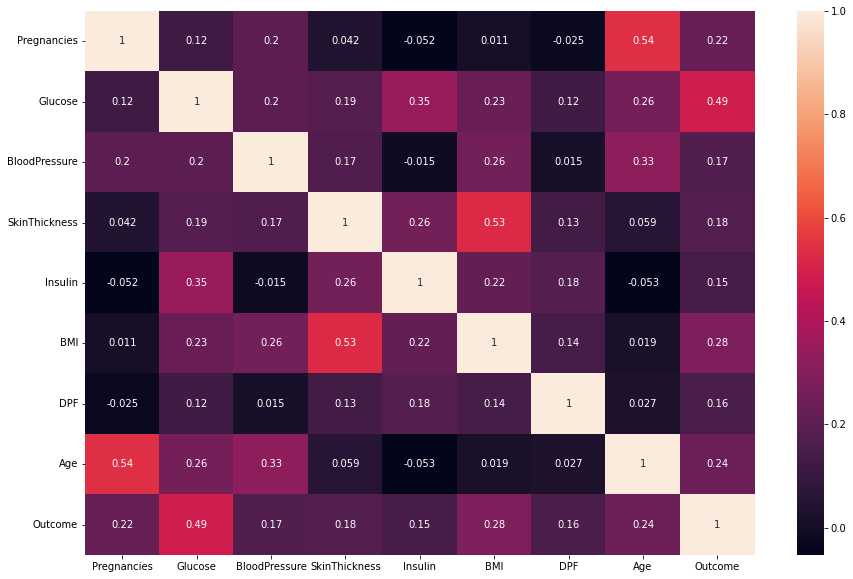

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

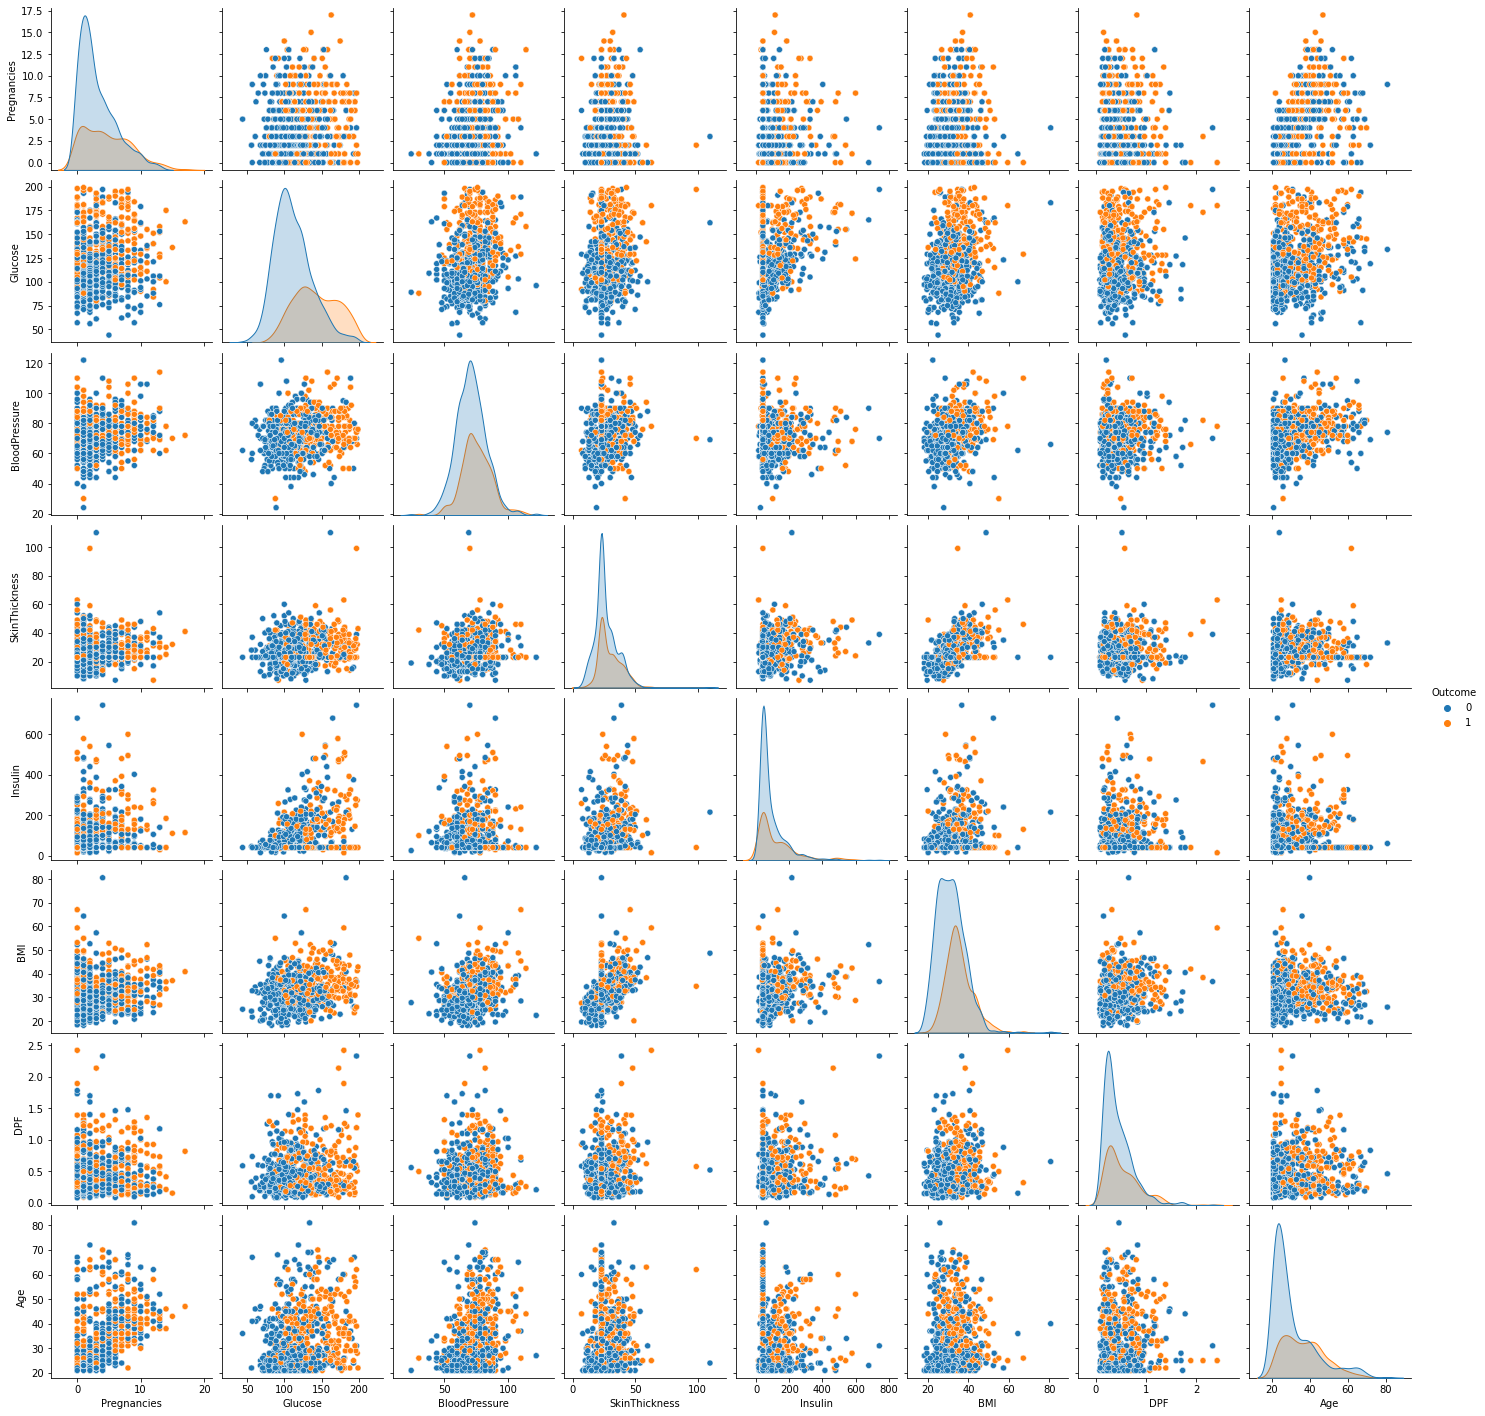

In [ ]:
#pairplot

sns.pairplot(df, hue = 'Outcome')

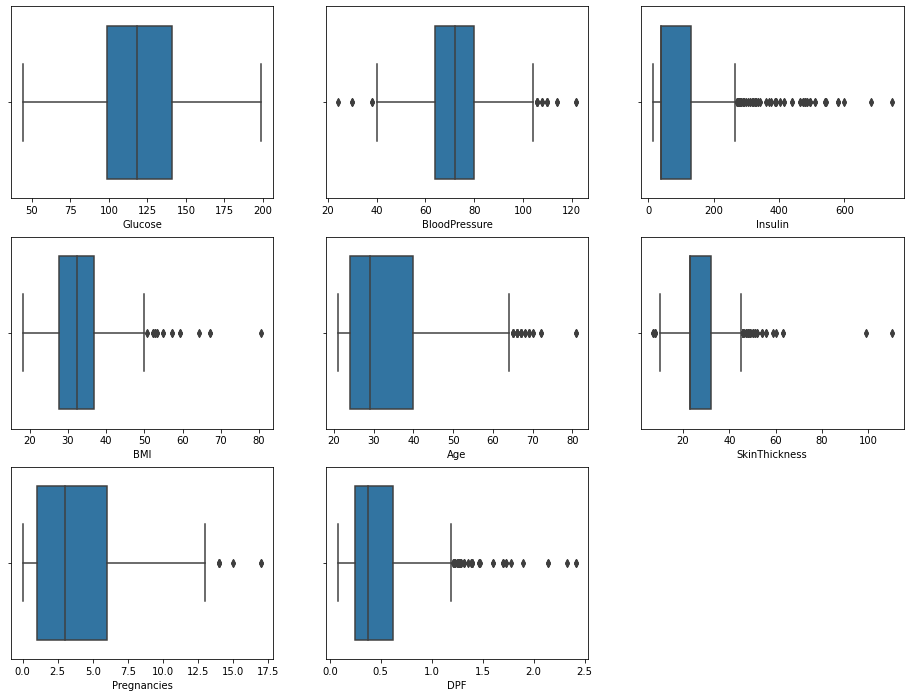

In [ ]:
# boxplot

plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DPF',data=df)

**Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
582,12,121.0,78.0,17,40,26.5,0.259,62
159,17,163.0,72.0,41,114,40.9,0.817,47
1827,1,102.0,74.0,23,40,39.5,0.293,42
318,3,115.0,66.0,39,140,38.1,0.150,28
708,9,164.0,78.0,23,40,32.8,0.148,45


In [ ]:
# Performing Quantiletransformer to remove the outlier
# This method transforms the features to follow a uniform or a normal distribution

from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
X_train_scaled = pd.DataFrame(quantile.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(quantile.transform(X_test), columns = X_test.columns)

In [ ]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,0.978478,0.532032,0.705706,0.079079,0.261762,0.202703,0.292292,0.967467
1,1.000000,0.873874,0.514515,0.908408,0.707207,0.884384,0.869917,0.879880
2,0.237738,0.298298,0.578579,0.352853,0.261762,0.852352,0.372873,0.797297
3,0.525025,0.466967,0.287788,0.862863,0.774274,0.799800,0.073574,0.463964
4,0.917918,0.878879,0.705706,0.352853,0.261762,0.530531,0.068569,0.845846


**Model Building**

In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model1(X, y):
    models = {
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state = 0),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [2,4,5,7]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state = 0),
            'parameters': {
                'min_samples_split': [1,2,3],
                'max_depth': [1,2,5,10]
            }
        }

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = 5)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model1(X_train, y_train)

,model,best_parameters,score
0,decision_tree,"{'criterion': 'entropy', 'max_depth': 7}",0.841250
1,random_forest,"{'max_depth': 10, 'min_samples_split': 2}",0.939375


In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model2(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(multi_class='auto'),
            'parameters': {
                'C': [1,2,3,5,10],
                "penalty": ['l1', 'l2']
               }
        },

        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,5,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = 5)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model2(X_train_scaled, y_train)

,model,best_parameters,score
0,logistic_regression,"{'C': 10, 'penalty': 'l2'}",0.76
1,svm,"{'C': 20, 'kernel': 'rbf'}",0.78


In [ ]:
# Creating Random Forest Model

classifier = RandomForestClassifier(max_depth = 10, min_samples_split = 2)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
# Stratified K-fold cross validation for gaining average accuracy

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(classifier, X_train,y_train, cv = skfold)
scores

array([0.928125, 0.95625 , 0.934375, 0.953125, 0.93125 ])

In [ ]:
print(" Average accuracy : {}" .format(scores.mean()))

 Average accuracy : 0.940625


**Model Evaluation**

**Test Data**

In [ ]:
#ConfusionMatrix 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm

array([[270,   2],
       [ 16, 112]])

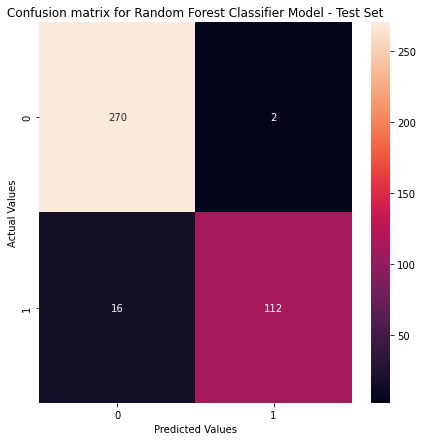

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(7,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score

score = round(accuracy_score(y_test, pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 95.5%


In [ ]:
# Classification Report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       272
           1       0.98      0.88      0.93       128

    accuracy                           0.95       400
   macro avg       0.96      0.93      0.95       400
weighted avg       0.96      0.95      0.95       400



**Train Data**

In [ ]:
# Confusion Matrix

train_pred=classifier.predict(X_train)

cm = confusion_matrix(y_train, train_pred)
cm

array([[1040,    4],
       [   9,  547]])

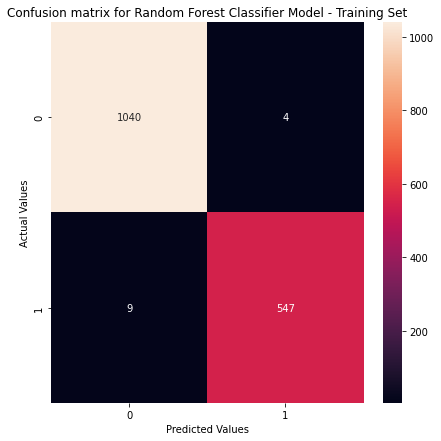

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(7,7))
p = sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(y_train, train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 99.19%


In [ ]:
# Classification Report
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1044
           1       0.99      0.98      0.99       556

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



**Predictions**

In [ ]:
# Creating a function for prediction

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    
    return classifier.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(0, 84, 82, 31, 125, 28.1, 0.233, 23)[0]
if prediction == 1:
  print("Sorry! You have diabetes.")
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(5, 148, 90, 34, 145, 34.5, 0.573, 59)[0]
if prediction == 1:
  print ("Sorry! You have diabetes.")
else:
  print("Great! You don't have diabetes.")

Sorry! You have diabetes.


**Pickling**

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('diabetes_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)